<a href="https://colab.research.google.com/github/Karlamch/karlaMCH/blob/main/eii_u1_01_22150453.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Coeficiente de correlación: 0.025121130626710283
Coeficiente de determinación: 0.0006310712039643285
Intervalo de confianza de 98% para la pendiente: (-343.26812333211785, 344.1824539624174)
Sxx: 34923.87195121952
Sxy: 15965.982926829281
Syy: 11566196.604390245
SSE: 11558897.510773825
SST: 11566196.604390245
SSR: 7299.093616419641
MRS: 7299.093616419641
MSE: 71351.21920230756
F: 0.10229809242255501
p-value: 0.0
Los residuales no siguen una distribución normal
Los residuales son homocedásticos


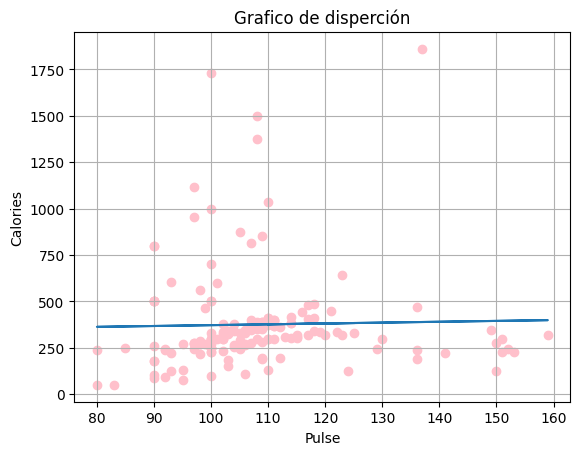

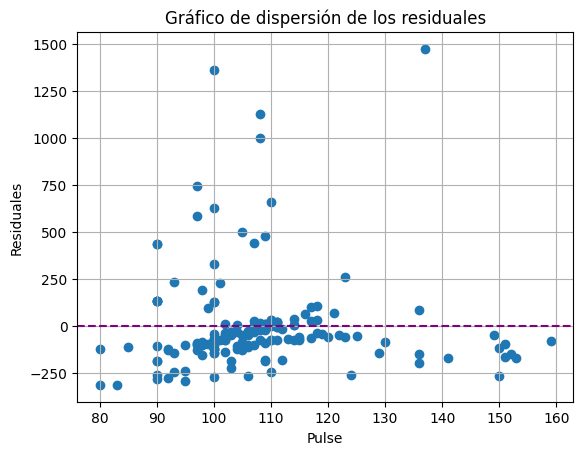

In [13]:
# A)
import numpy as np

import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Karlamch/karlaMCH/refs/heads/main/data.csv')
df.head()

df.dropna(inplace = True)

X = df[["Pulse"]]
Y = df['Calories']

# B)#Realiza un grafico con la dispersión y la recta de regresión ajustada
from sklearn import linear_model
import matplotlib.pyplot as plt

regr = linear_model.LinearRegression()
regr.fit(X, Y)

plt.scatter(X, Y, color="pink") #fixed syntax error here
plt.plot(X, regr.predict(X))
plt.xlabel('Pulse')
plt.ylabel('Calories')
plt.title('Grafico de disperción')
plt.grid(True)


# C)Calcula el coeficiente de correlación y el coeficiente de determinación e interpreta los resultados.
correlation = df['Pulse'].corr(df['Calories'])
print(f"Coeficiente de correlación: {correlation}")

r2 = regr.score(X, Y)
print(f"Coeficiente de determinación: {r2}")
#Coeficiente de correlación: es cercano a 0, lo que nos indica que tiene una linealidad debil
#Coeficiente de determinación: esta muy alejada de 0, explica un pronostico más pequeño, casi nulo

# D)
# Obtén un intervalo de confianza de 98% para la pendiente e interpreta el
#resultado. Respalda tu conclusión usando ANOVA.
nivel_de_significancia = 0.2
import scipy.stats as stats
t = stats.t.ppf(1 - nivel_de_significancia / 2, len(df) - 2)
error_estandar = np.sqrt(np.sum((Y - regr.predict(X)) ** 2) / (len(df) - 2))
pendiente_inferior = regr.coef_[0] - t * error_estandar
pendiente_superior = regr.coef_[0] + t * error_estandar
print(f"Intervalo de confianza de 98% para la pendiente: ({pendiente_inferior}, {pendiente_superior})")
#Se puede confirmar que el intervalo esta en un rango de valores en el cual es probable que esté dentro del valor independiente y dependiente

X_mean = np.mean(X['Pulse'])
Y_mean = np.mean(Y)
Sxx = np.sum((X['Pulse'] - X_mean)**2)
Sxy = np.sum((X['Pulse'] - X_mean) * (Y - Y_mean))
Syy = np.sum((Y - Y_mean)**2)
Yc = regr.predict(X)
residuales = Y - Yc

print (f"Sxx: {Sxx}")
print (f"Sxy: {Sxy}")
print (f"Syy: {Syy}")
print (f"SSE: {np.sum(residuales**2)}")
print (f"SST: {np.sum((Y-np.mean(Y))**2)}")
print (f"SSR: {np.sum((Yc-np.mean(Y))**2)/1}")
print (f"MRS: {np.sum((Yc-np.mean(Y))**2)/1}")
print (f"MSE: {np.sum(residuales**2)/(len(Y)-2)}")
print (f"F: {(np.sum((Yc-np.mean(Y))**2)/1)/(np.sum(residuales**2)/(len(Y)-2))}")
print (f"p-value: {stats.f.sf(np.sum((Yc-np.mean(Y))**2)/1, 1, np.sum(residuales**2)/(len(Y)-2))}")

#E)
#Verifica los supuestos
#RESIDUALES
residuales = Y - Yc
plt.figure()
plt.scatter(X, Y - Yc)
plt.xlabel('Pulse')
plt.ylabel('Residuales')
plt.title('Gráfico de dispersión de los residuales')
plt.axhline(y=0, color='purple', linestyle='--')
plt.grid(True)

# Prueba de shapiro
from scipy.stats import shapiro
_,valor_p = shapiro(residuales)

if valor_p > 0.05:
    print("Los residuales siguen una distribución normal")
else:
    print("Los residuales no siguen una distribución normal")

# Breusch-Pagan
from statsmodels.stats.diagnostic import het_breuschpagan
X = np.column_stack((np.ones(len(X)), X))
_, valor_p, _, _ = het_breuschpagan(residuales, X)
if valor_p < 0.05:
    print("Los residuales no son homocedásticos")
else:
    print("Los residuales son homocedásticos")